<a href="https://colab.research.google.com/github/PranavShashidhara/Country-Default-Prediction/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
from sklearn.preprocessing import MinMaxScaler

In [38]:
df = pd.read_csv('World_Bank_Cleared.csv')
df.head()

,Unnamed: 0,Country,Year,CURRENT_GDP_USD,GDP_GROWTH_PCT,ANUAL_INFLATION_PCT,TOT_EXT_DEBT_USD,TOT_GOVT_DEBT_LCU,LONG_EXT_DEBT_USD,PUBLIC_OWNED_DEBT_USD,...,UNEMPLOYMENT_RATE,POP_GROWTH_RATE,DEBT_TO_GDP,TRADE_BALANCE,TRADE_BAL_PCT_GDP,INFLATION_RATE_IN_PCT,REAL_GDP_GROWTH,ANNUAL_INFLATION_PCT,DEFAULT,Country_TargetEncoded
0,0,Zimbabwe,1960,1.052990e+09,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03125
1,1,Zambia,1960,7.130000e+08,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03125
2,2,"Yemen, Rep.",1960,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
3,3,West Bank and Gaza,1960,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
4,4,Virgin Islands (U.S.),1960,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


In [39]:
df.describe()

,Unnamed: 0,Year,CURRENT_GDP_USD,GDP_GROWTH_PCT,ANUAL_INFLATION_PCT,TOT_EXT_DEBT_USD,TOT_GOVT_DEBT_LCU,LONG_EXT_DEBT_USD,PUBLIC_OWNED_DEBT_USD,PRIVATE_OWNED_DEBT_USD,...,UNEMPLOYMENT_RATE,POP_GROWTH_RATE,DEBT_TO_GDP,TRADE_BALANCE,TRADE_BAL_PCT_GDP,INFLATION_RATE_IN_PCT,REAL_GDP_GROWTH,ANNUAL_INFLATION_PCT,DEFAULT,Country_TargetEncoded
count,17024.000000,17024.000000,1.702400e+04,17024.000000,17024.000000,1.702400e+04,1.702400e+04,1.702400e+04,1.702400e+04,1.702400e+04,...,17024.000000,17024.000000,17024.000000,1.702400e+04,17024.000000,17024.000000,17024.000000,17024.000000,17024.000000,17024.000000
mean,8511.500000,1991.500000,9.914214e+11,2.998262,48.219577,4.270584e+10,5.991442e+12,3.163933e+10,1.902247e+10,1.261707e+10,...,3.597706,1.702967,0.197170,4.814357e+09,-2.988762,11.876687,-9.531931,48.219577,0.011572,0.011572
std,4914.549827,18.473496,5.039162e+12,5.900433,497.142603,3.604063e+11,1.419538e+14,2.556686e+11,1.377397e+11,1.225007e+11,...,5.429532,1.653326,0.503469,7.169058e+10,12.600265,232.063693,231.677322,497.142603,0.106952,0.040319
min,0.000000,1960.000000,0.000000e+00,-64.047107,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,-27.722225,0.000000,-9.711190e+11,-164.794853,-17.640424,-23777.031771,0.000000,0.000000,0.000000
25%,4255.750000,1975.750000,3.432015e+08,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.694710,0.000000,-4.668168e+08,-4.451401,0.000000,-1.415617,0.000000,0.000000,0.000000
50%,8511.500000,1991.500000,6.879681e+09,2.802557,0.061926,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,1.676320,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.061926,0.000000,0.000000
75%,12767.250000,2007.250000,1.100545e+11,5.511395,69.114982,1.558048e+09,0.000000e+00,1.255099e+09,1.119371e+09,0.000000e+00,...,5.914001,2.592450,0.275075,0.000000e+00,0.000000,5.029200,0.000000,69.114982,0.000000,0.000000
max,17023.000000,2023.000000,1.054350e+14,153.492641,38796.557297,9.275898e+12,8.920558e+15,6.425824e+12,3.489378e+12,2.936446e+12,...,38.800000,20.473239,18.465508,1.334049e+12,81.697241,23773.131774,150.624310,38796.557297,1.000000,0.437500


In [40]:
print(df.isnull().sum())

Unnamed: 0                0
Country                   0
Year                      0
CURRENT_GDP_USD           0
GDP_GROWTH_PCT            0
ANUAL_INFLATION_PCT       0
TOT_EXT_DEBT_USD          0
TOT_GOVT_DEBT_LCU         0
LONG_EXT_DEBT_USD         0
PUBLIC_OWNED_DEBT_USD     0
PRIVATE_OWNED_DEBT_USD    0
SHORT_TERM_EXT_DEBT       0
CUR_VAL_EXT_DEBT          0
EXPORTS                   0
IMPORTS                   0
TAX_REVENUE_PCT_GDP       0
UNEMPLOYMENT_RATE         0
POP_GROWTH_RATE           0
DEBT_TO_GDP               0
TRADE_BALANCE             0
TRADE_BAL_PCT_GDP         0
INFLATION_RATE_IN_PCT     0
REAL_GDP_GROWTH           0
ANNUAL_INFLATION_PCT      0
DEFAULT                   0
Country_TargetEncoded     0
dtype: int64


In [41]:
for col in df.select_dtypes(include=['object']):
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Column: Country
Country
Zimbabwe                       64
Cameroon                       64
Croatia                        64
Cote d'Ivoire                  64
Costa Rica                     64
                               ..
Mali                           64
Maldives                       64
Malaysia                       64
Malawi                         64
Africa Eastern and Southern    64
Name: count, Length: 266, dtype: int64


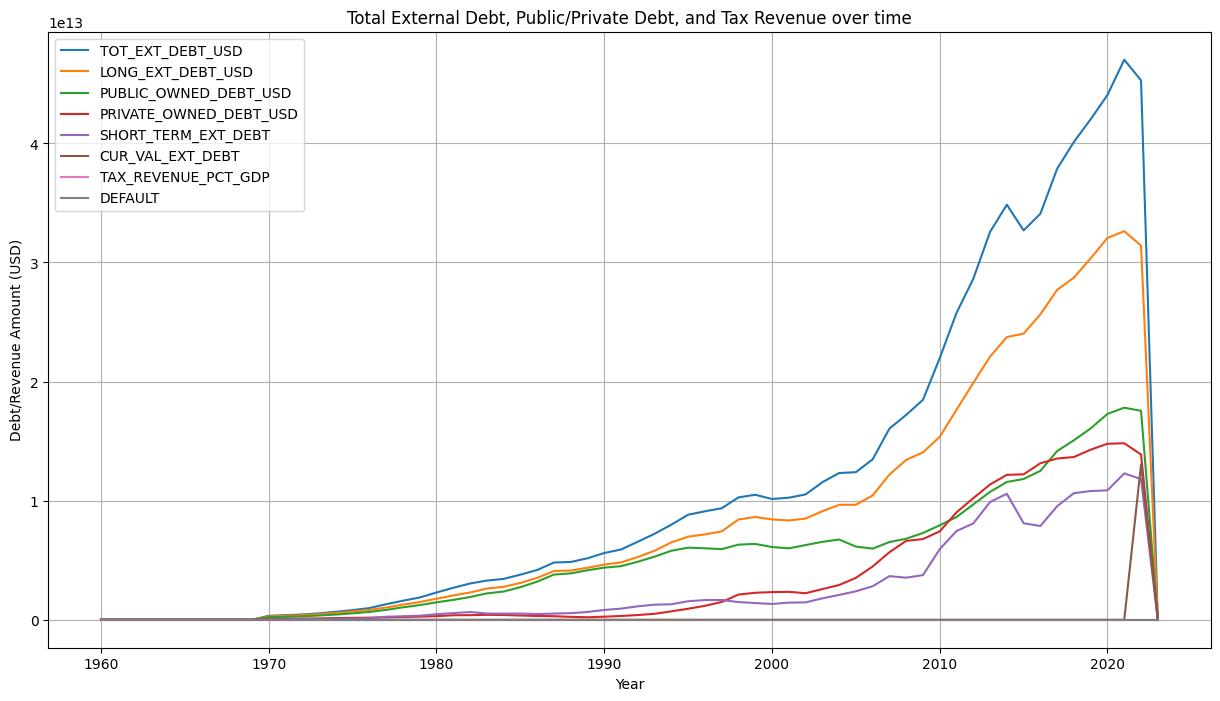

In [42]:
debt_revenue_cols = ['TOT_EXT_DEBT_USD', 'LONG_EXT_DEBT_USD',
                     'PUBLIC_OWNED_DEBT_USD', 'PRIVATE_OWNED_DEBT_USD',
                     'SHORT_TERM_EXT_DEBT', 'CUR_VAL_EXT_DEBT', 'TAX_REVENUE_PCT_GDP', 'DEFAULT']

# Group data by year and sum the relevant columns
grouped_data = df.groupby('Year')[debt_revenue_cols].sum()


# Plotting the data
plt.figure(figsize=(15,8))
for col in debt_revenue_cols:
    plt.plot(grouped_data.index, grouped_data[col], label=col)

plt.xlabel('Year')
plt.ylabel('Debt/Revenue Amount (USD)')
plt.title('Total External Debt, Public/Private Debt, and Tax Revenue over time')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
from scipy.stats import pointbiserialr

correlation, p_value = pointbiserialr(df['DEFAULT'], df['TOT_EXT_DEBT_USD'])

print(f"Point-Biserial Correlation: {correlation}")
print(f"P-value: {p_value}")


Point-Biserial Correlation: -0.008536017522842653
P-value: 0.265414617666183


The default column is binary with only 1 or 0 as the values and the data needs to be scaled.


Point-Biserial Correlation (Scaled): -0.14665090356999783
P-value (Scaled): 0.2475384540646234


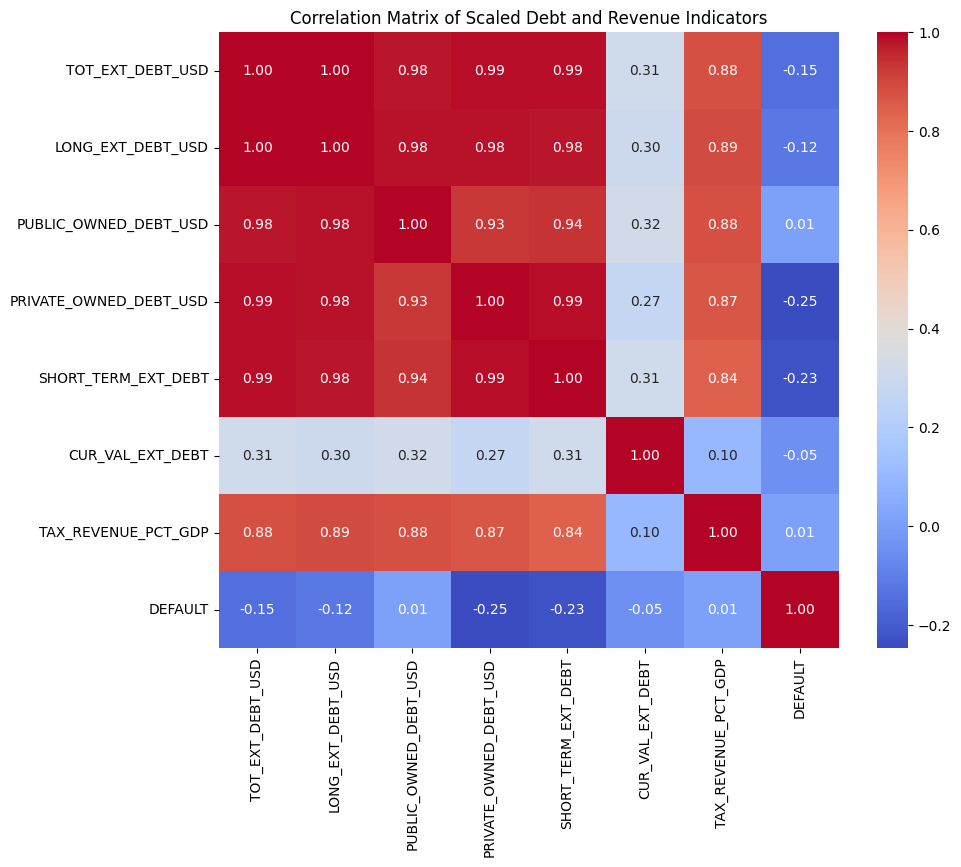

In [44]:
scaler = MinMaxScaler()
grouped_data[debt_revenue_cols] = scaler.fit_transform(grouped_data[debt_revenue_cols])
correlation, p_value = pointbiserialr(grouped_data['DEFAULT'], grouped_data['TOT_EXT_DEBT_USD'])

print(f"Point-Biserial Correlation (Scaled): {correlation}")
print(f"P-value (Scaled): {p_value}")

correlation_matrix = grouped_data[debt_revenue_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Scaled Debt and Revenue Indicators')
plt.show()

DEFAULT
0.0    16827
1.0      197
Name: count, dtype: int64
DEFAULT
0.0    98.84281
1.0     1.15719
Name: count, dtype: float64


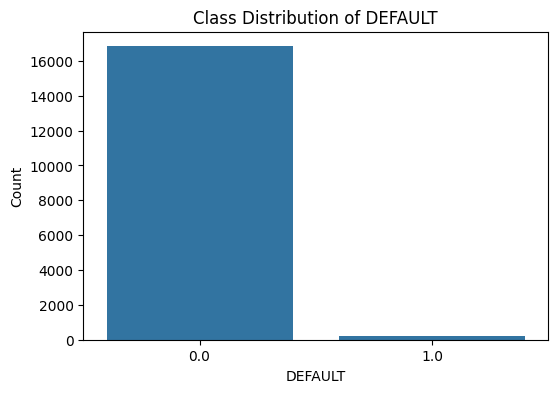

In [45]:
default_counts = df['DEFAULT'].value_counts()
print(default_counts)

default_percentages = default_counts / len(df) * 100
print(default_percentages)

plt.figure(figsize=(6, 4)) # Highly imbalance data.
sns.countplot(x='DEFAULT', data=df)
plt.title('Class Distribution of DEFAULT')
plt.xlabel('DEFAULT')
plt.ylabel('Count')
plt.show()

In [46]:
print(df.dtypes)

Unnamed: 0                  int64
Country                    object
Year                        int64
CURRENT_GDP_USD           float64
GDP_GROWTH_PCT            float64
ANUAL_INFLATION_PCT       float64
TOT_EXT_DEBT_USD          float64
TOT_GOVT_DEBT_LCU         float64
LONG_EXT_DEBT_USD         float64
PUBLIC_OWNED_DEBT_USD     float64
PRIVATE_OWNED_DEBT_USD    float64
SHORT_TERM_EXT_DEBT       float64
CUR_VAL_EXT_DEBT          float64
EXPORTS                   float64
IMPORTS                   float64
TAX_REVENUE_PCT_GDP       float64
UNEMPLOYMENT_RATE         float64
POP_GROWTH_RATE           float64
DEBT_TO_GDP               float64
TRADE_BALANCE             float64
TRADE_BAL_PCT_GDP         float64
INFLATION_RATE_IN_PCT     float64
REAL_GDP_GROWTH           float64
ANNUAL_INFLATION_PCT      float64
DEFAULT                   float64
Country_TargetEncoded     float64
dtype: object


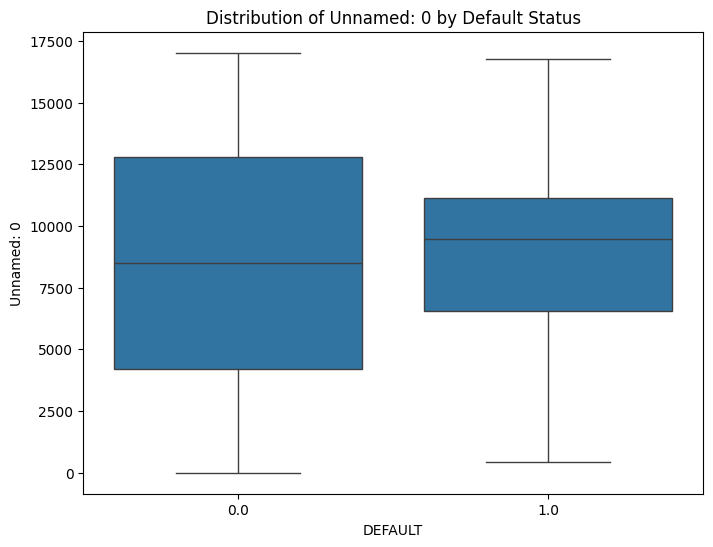

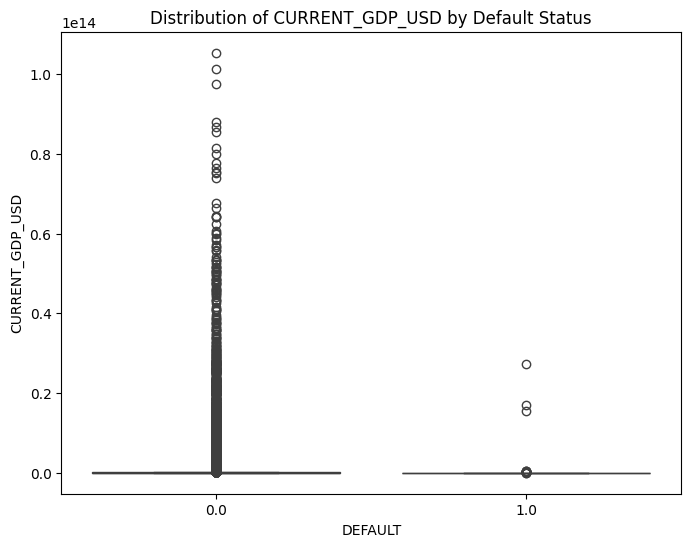

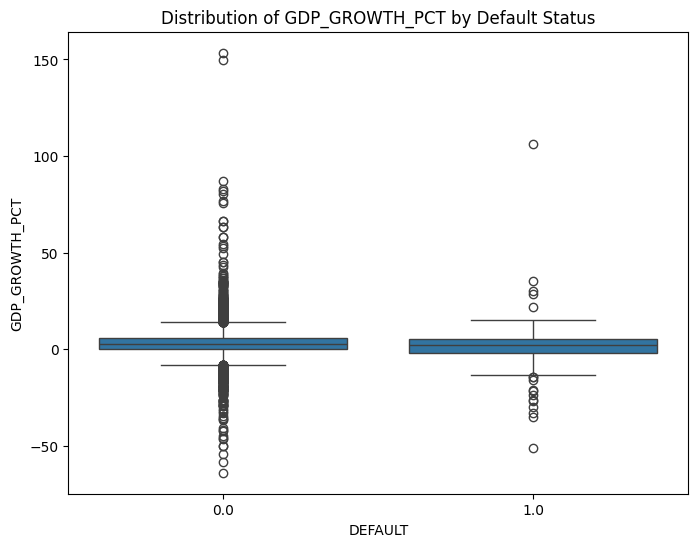

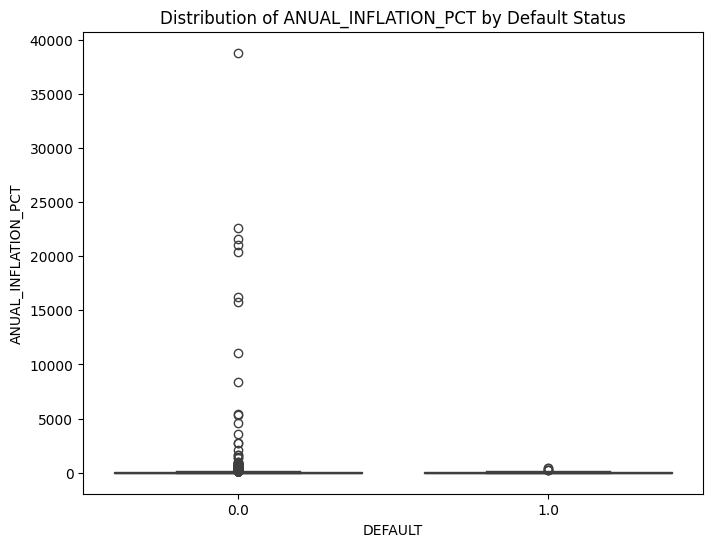

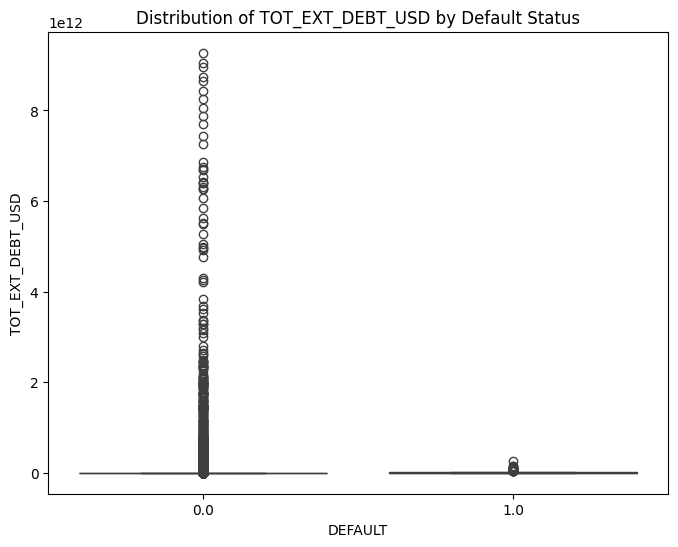

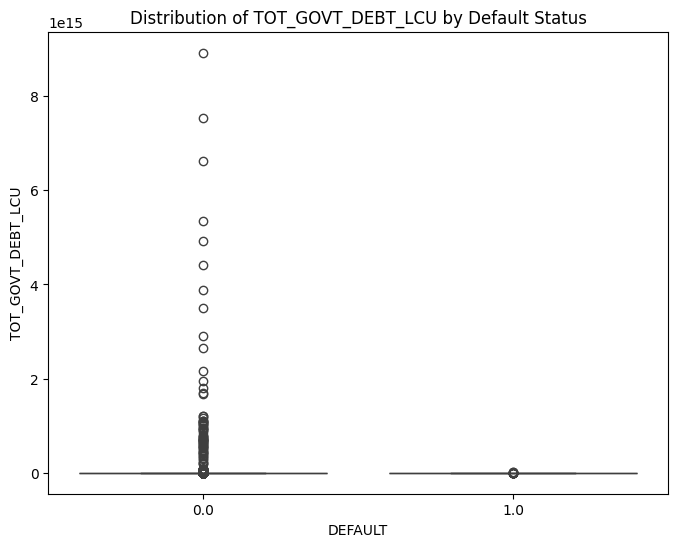

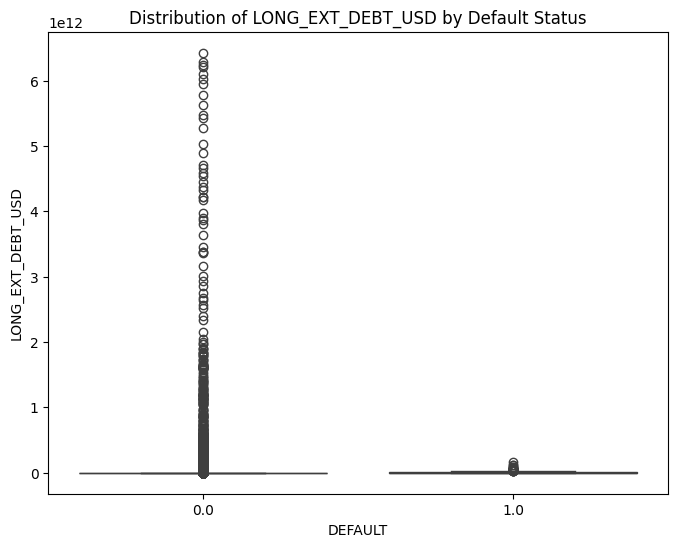

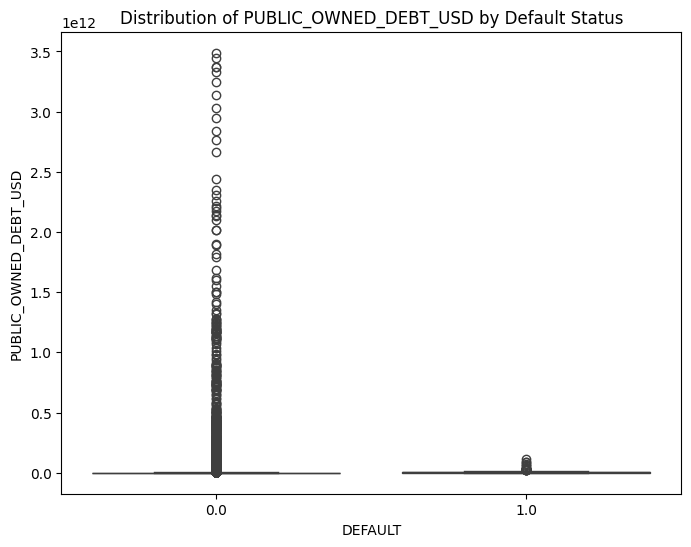

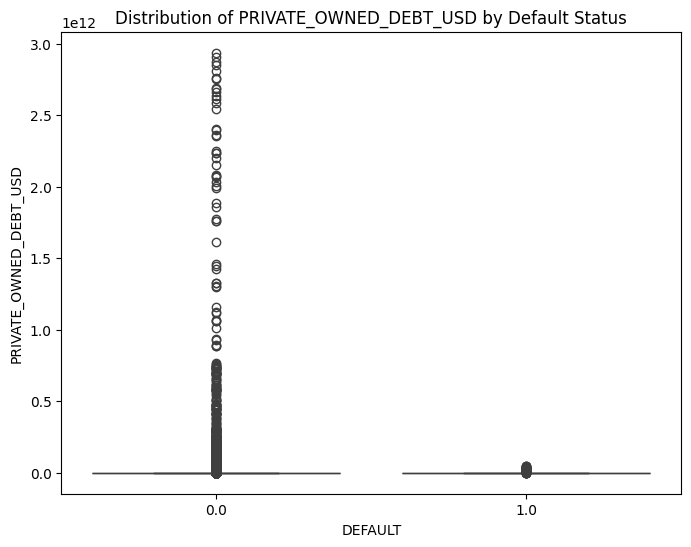

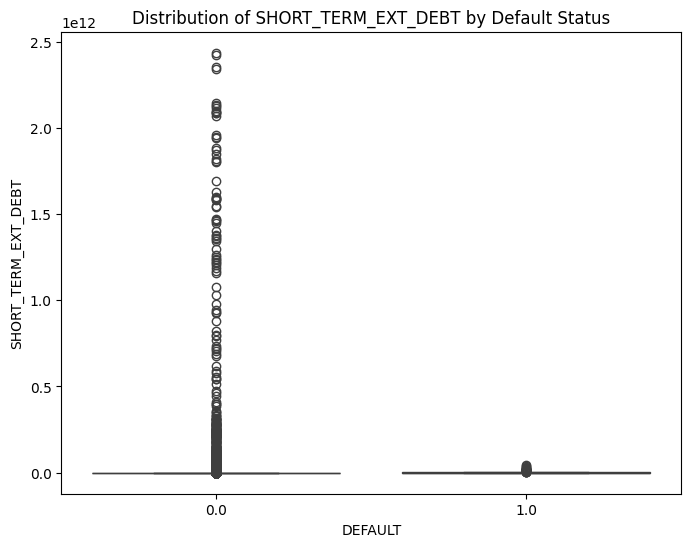

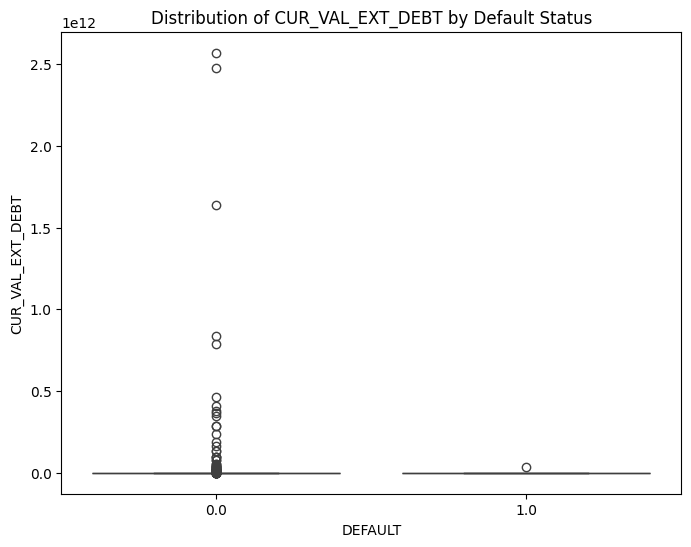

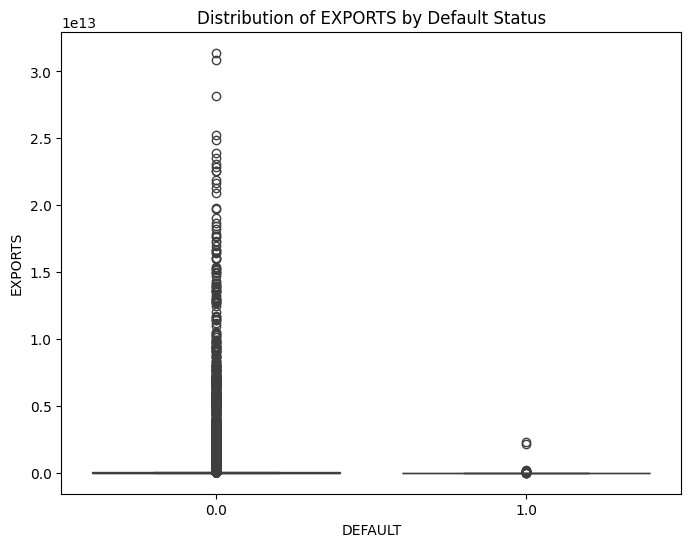

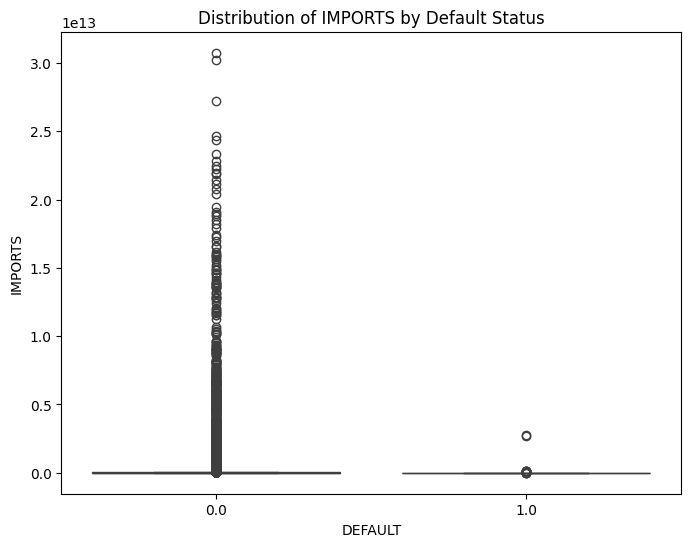

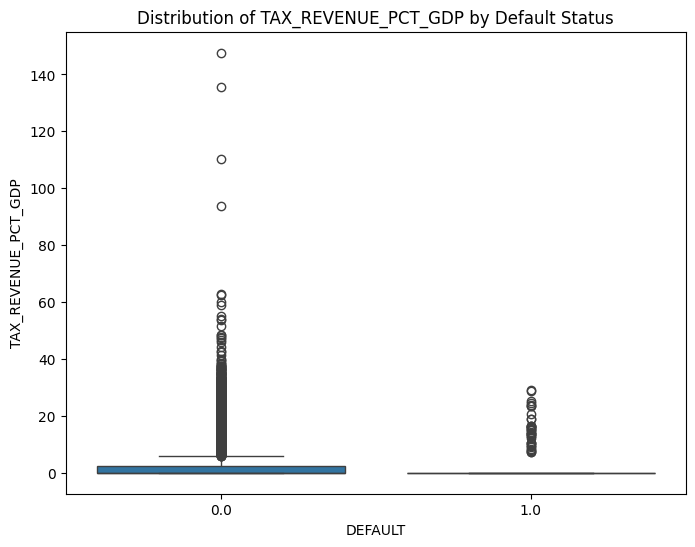

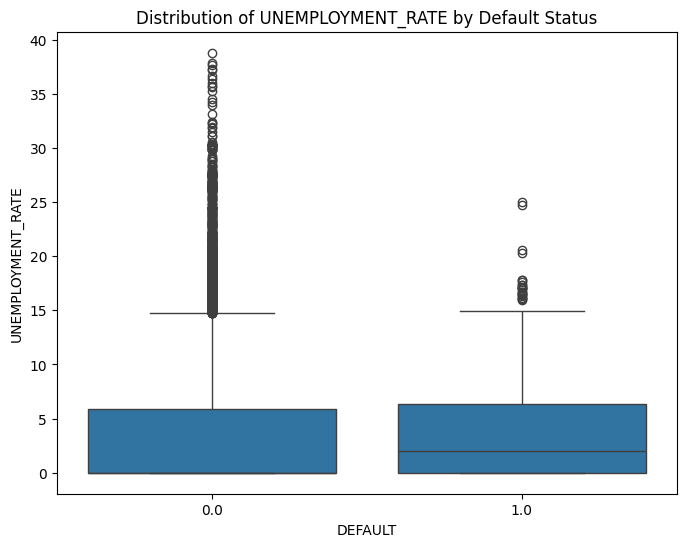

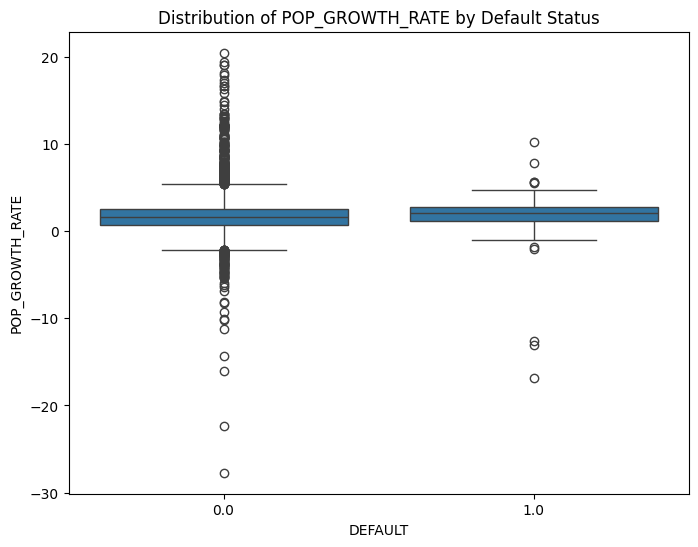

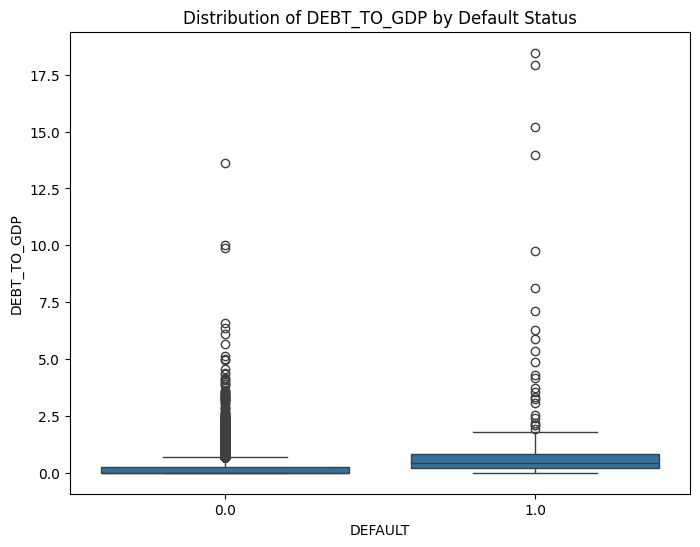

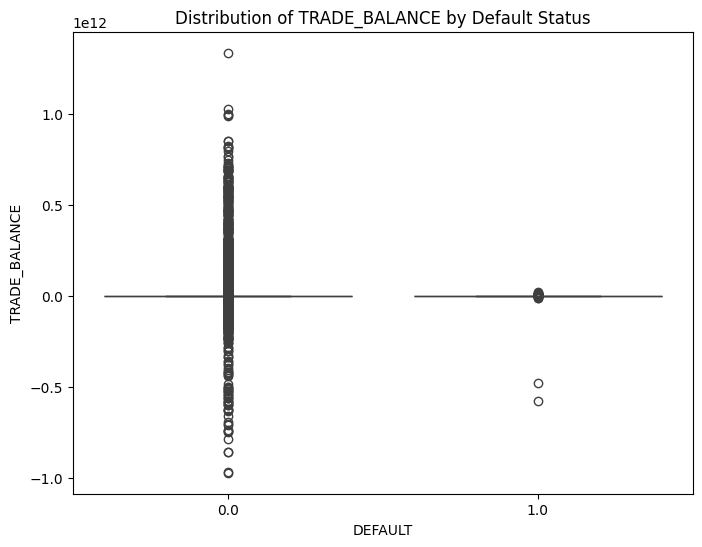

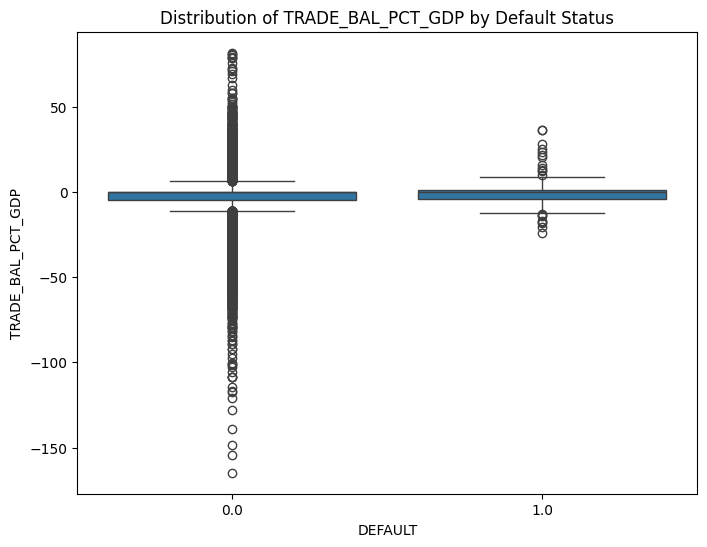

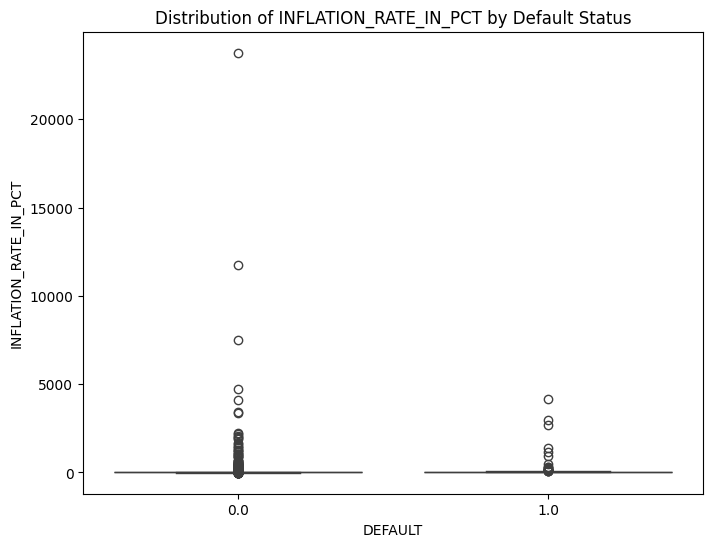

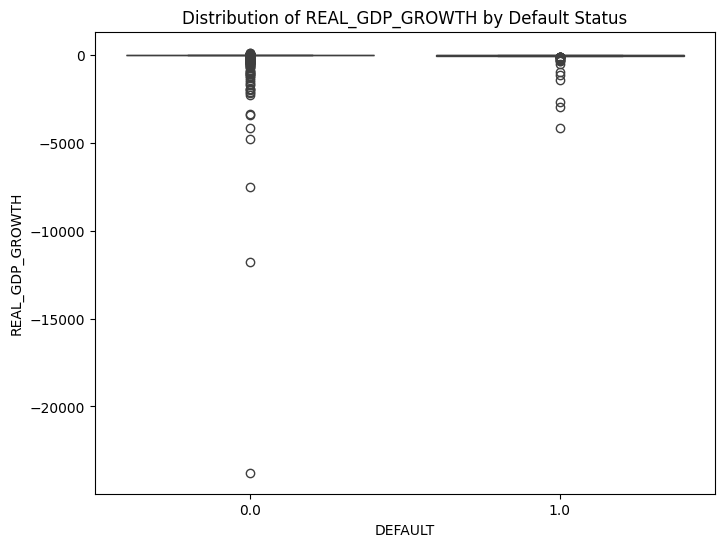

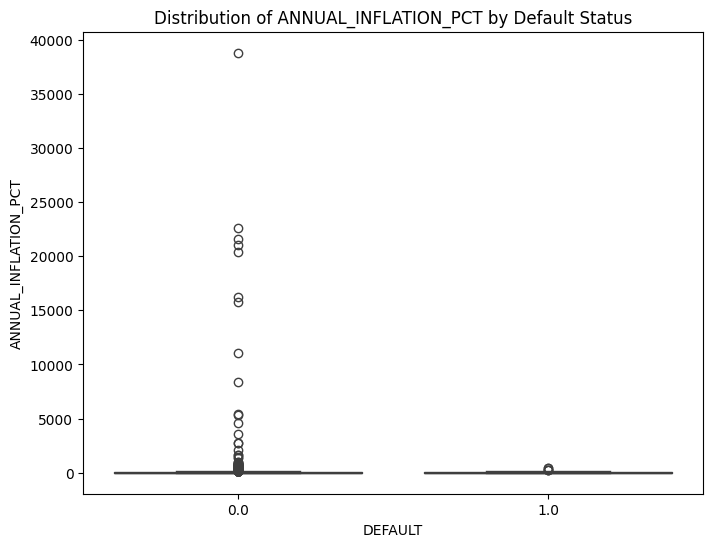

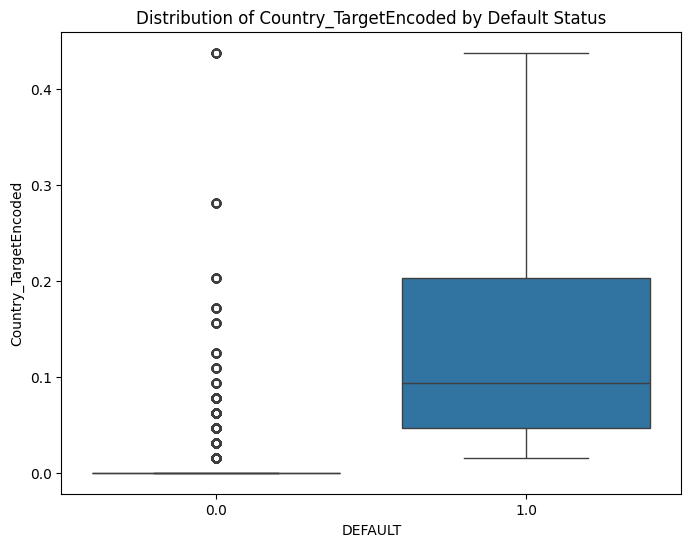

In [47]:
# prompt: what else can I do for EDA of this data?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.select_dtypes(include=['object']):
    if col != 'Country': # Assuming 'Country' is not relevant for this analysis.
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue='DEFAULT', data=df)
        plt.title(f'Default Rate by {col}')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.show()


for col in df.select_dtypes(include=np.number):
    if col not in ['Year', 'DEFAULT']: # Exclude irrelevant columns
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='DEFAULT', y=col, data=df)
        plt.title(f'Distribution of {col} by Default Status')
        plt.show()

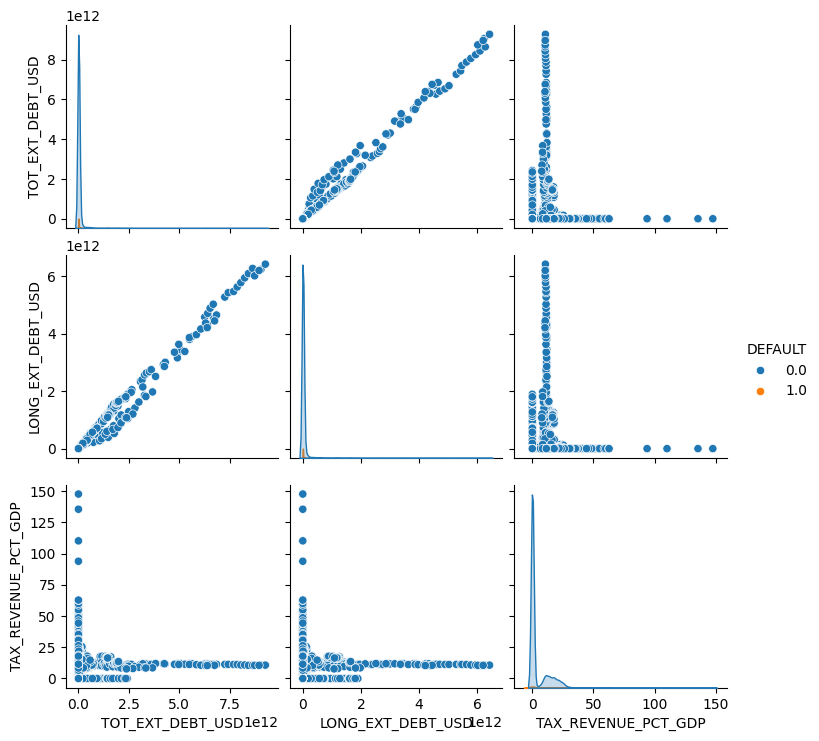

In [48]:
key_numerical_features = ['TOT_EXT_DEBT_USD', 'LONG_EXT_DEBT_USD', 'TAX_REVENUE_PCT_GDP'] # Add more if needed
sns.pairplot(df[key_numerical_features + ['DEFAULT']], hue='DEFAULT')
plt.show()

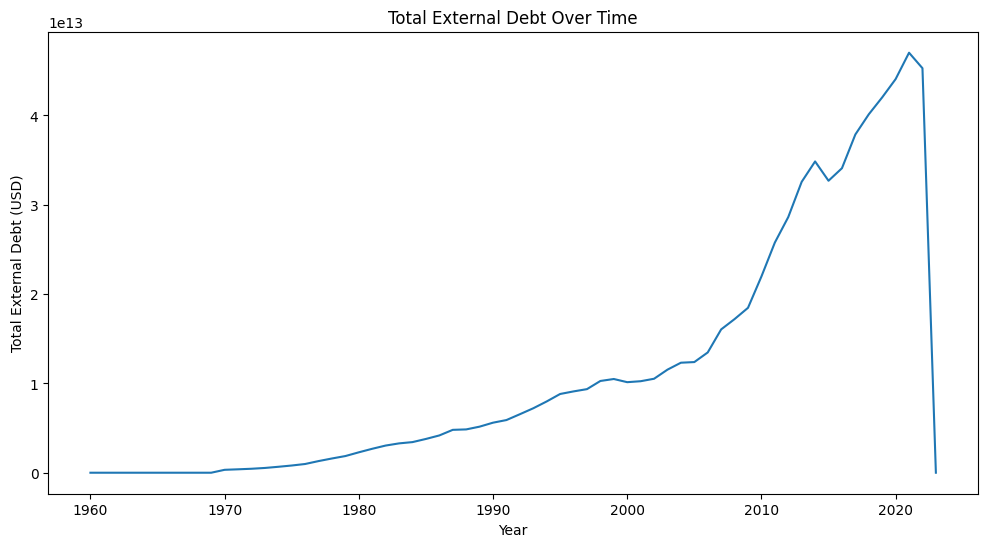

T-test (Unnamed: 0): t-statistic=-1.61, p-value=0.108
T-test (CURRENT_GDP_USD): t-statistic=1.83, p-value=0.067
T-test (GDP_GROWTH_PCT): t-statistic=4.55, p-value=0.000
T-test (ANUAL_INFLATION_PCT): t-statistic=0.28, p-value=0.776
T-test (TOT_EXT_DEBT_USD): t-statistic=1.11, p-value=0.265
T-test (TOT_GOVT_DEBT_LCU): t-statistic=0.57, p-value=0.566
T-test (LONG_EXT_DEBT_USD): t-statistic=1.14, p-value=0.253
T-test (PUBLIC_OWNED_DEBT_USD): t-statistic=1.17, p-value=0.242
T-test (PRIVATE_OWNED_DEBT_USD): t-statistic=1.07, p-value=0.284
T-test (SHORT_TERM_EXT_DEBT): t-statistic=1.00, p-value=0.316
T-test (CUR_VAL_EXT_DEBT): t-statistic=0.25, p-value=0.802
T-test (EXPORTS): t-statistic=2.25, p-value=0.024
T-test (IMPORTS): t-statistic=2.22, p-value=0.027
T-test (TAX_REVENUE_PCT_GDP): t-statistic=1.99, p-value=0.047
T-test (UNEMPLOYMENT_RATE): t-statistic=-2.10, p-value=0.035
T-test (POP_GROWTH_RATE): t-statistic=-0.95, p-value=0.340
T-test (DEBT_TO_GDP): t-statistic=-27.58, p-value=0.000
T-

In [49]:

plt.figure(figsize=(12,6))
df.groupby('Year')['TOT_EXT_DEBT_USD'].sum().plot()
plt.title('Total External Debt Over Time')
plt.xlabel('Year')
plt.ylabel('Total External Debt (USD)')
plt.show()

from scipy.stats import ttest_ind, mannwhitneyu
for col in df.select_dtypes(include=np.number):
    if col not in ['Year', 'DEFAULT']:
        group1 = df[df['DEFAULT'] == 0][col]
        group2 = df[df['DEFAULT'] == 1][col]
        t_stat, p_value = ttest_ind(group1, group2)  # Or mannwhitneyu if data is not normally distributed
        print(f"T-test ({col}): t-statistic={t_stat:.2f}, p-value={p_value:.3f}")
